In [1]:
# script to collect serial data from arduino
# IMPORTANT: ensure Arduino serial monitor is closed before running this script
import csv
import os
import serial # pip install pyserial
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# list avaialble ports
import serial.tools.list_ports
comlist = serial.tools.list_ports.comports()
connected = []
for element in comlist:
    connected.append(element.device)
print("Connected COM ports: " + str(connected))

Connected COM ports: ['/dev/cu.GalaxyBuds4816', '/dev/cu.Bluetooth-Incoming-Port', '/dev/cu.usbmodem14201']


Connected to port /dev/cu.usbmodem14201.
File ./test_data.csv already exists.
File ./test_data_1.csv already exists.
File ./test_data_2.csv already exists.
File ./test_data_3.csv already exists.
File ./test_data_4.csv already exists.
File ./test_data_5.csv already exists.
File ./test_data_6.csv already exists.
File ./test_data_7.csv already exists.
File ./test_data_8.csv already exists.
File ./test_data_9.csv already exists.
File ./test_data_10.csv already exists.
File ./test_data_11.csv already exists.
File ./test_data_12.csv already exists.
File ./test_data_13.csv already exists.
File ./test_data_14.csv already exists.
File ./test_data_15.csv already exists.
File ./test_data_16.csv already exists.
File ./test_data_17.csv already exists.
File ./test_data_18.csv already exists.
File ./test_data_19.csv already exists.
File ./test_data_20.csv already exists.
File ./test_data_21.csv already exists.
File ./test_data_22.csv already exists.
File ./test_data_23.csv already exists.
File ./test

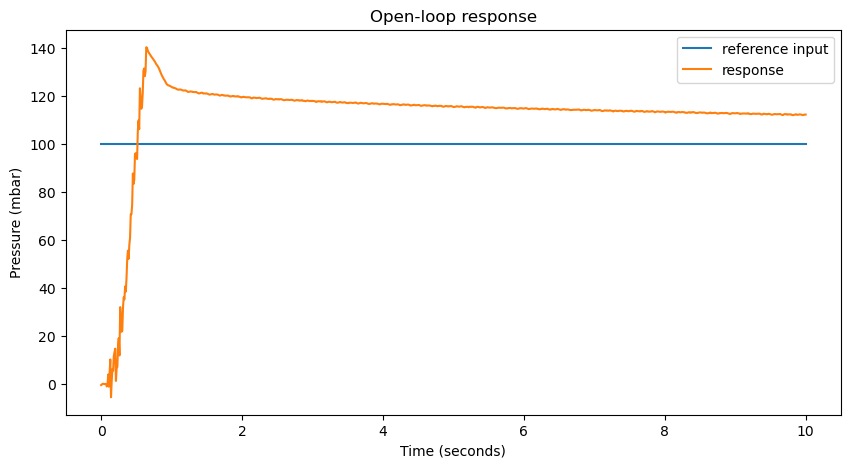

In [112]:
# set up comport:
COMPORT = '/dev/cu.usbmodem14201' # adjust this
arduino = serial.Serial(COMPORT, 115200, bytesize=8)
print(f"Connected to port {arduino.name}.")

# get name of file to save data to:
FILENAME = './test_data'
NEWFILE = './test_data'
INDEX = 1

while os.path.exists(NEWFILE+'.csv'):
    print(f"File {NEWFILE}.csv already exists.")
    NEWFILE = FILENAME + '_' + str(INDEX)
    INDEX += 1
print(f"Saving data to {NEWFILE}.csv")


# open corresponding file and record data:
with open(NEWFILE+'.csv', 'w', newline='') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',')

    ############################################################################
    # Read in inital values:
    # cols = arduino.readline().decode('utf-8').rstrip().split('\n')
    # datawriter.writerow([cols]) # Log column headers

    datawriter.writerow(arduino.readline().decode('utf-8').rstrip().split('\n'))
    Freq = float(arduino.readline().decode('utf-8').rstrip())
    datawriter.writerow([Freq]) # Log Sample Frequency in Hz

    datawriter.writerow(arduino.readline().decode('utf-8').rstrip().split('\n'))
    Time = float(arduino.readline().decode('utf-8').rstrip())
    datawriter.writerow([Time]) # Log test duration in seconds

    datawriter.writerow(arduino.readline().decode('utf-8').rstrip().split('\n'))
    H_Gain = float(arduino.readline().decode('utf-8').rstrip())
    datawriter.writerow([H_Gain]) # Log Feedback gain

    datawriter.writerow(arduino.readline().decode('utf-8').rstrip().split('\n'))
    cnt_max = int(arduino.readline().decode('utf-8').rstrip())
    datawriter.writerow([cnt_max]) # Log total number of timesteps

    datawriter.writerow(arduino.readline().decode('utf-8').rstrip().split('\n'))
    pressure_offset = float(arduino.readline().decode('utf-8').rstrip())
    datawriter.writerow([pressure_offset]) # Log pressure offset
    ############################################################################

    # Initialize Vectors
    T = np.linspace(0, Time, cnt_max) # Setup Time Vector
    R = np.zeros(cnt_max)             # Initialize Reference Input Vector
    Y = np.zeros(cnt_max)             # Initialize Output Vector

    print("Initialization complete.")
    print("Starting data capture...")

    # read in output data line by line:
    # time, input, output
    for i in range(cnt_max):
        R[i] = float(arduino.readline().decode('utf-8').rstrip())
        Y[i] = float(arduino.readline().decode('utf-8').rstrip())
        # row = R[i] + Y[i]
        datawriter.writerow([R[i], Y[i]])
        # datawriter.writerow([Y[i]])

print('Data capture complete.')

# Plot captured data
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title('Open-loop response')
ax.plot(T, R, label='reference input')
ax.plot(T, Y, label='response')
ax.set_ylabel('Pressure (mbar)')
ax.set_xlabel('Time (seconds)')
plt.savefig(NEWFILE+'_plot.png')
plt.legend()
plt.show()